In [3]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from PIL import Image
import os

In [4]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.reshape(64 * 64)

    def __len__(self):
        return len(self.img_names)

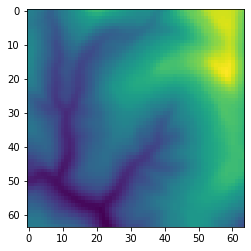

In [6]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[400].view(64, 64))
plt.show()

In [7]:
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [8]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(64 * 64, 512),
            nn.ReLU(True),
            nn.Linear(512, 128),
            nn.ReLU(True),
            nn.Linear(128, 32))
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(True),
            nn.Linear(128, 512),
            nn.ReLU(True),
            nn.Linear(512, 64 * 64))
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [11]:
net = Autoencoder().cuda()

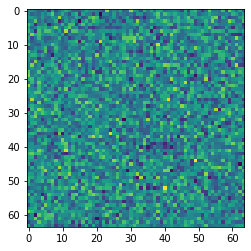

In [12]:
x = Variable(dataset[400]).cuda()
output = net(x)
plt.imshow(output.cpu().view(64, 64).detach().numpy())
plt.show()

In [190]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)

epochs = 10

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        x = Variable(data).cuda()
        output = net(x)
        loss = nn.MSELoss()(output, x)
        loss.backward()
        optimizer.step()
    print(loss)

KeyboardInterrupt: 

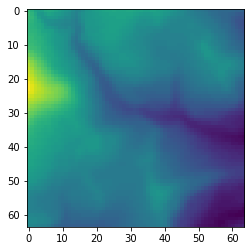

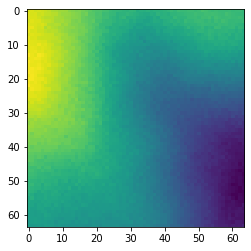

In [15]:
img = dataset[100]
x = Variable(img).cuda()
plt.imshow(img.view(64, 64))
plt.show()
output = net(x)
plt.imshow(output.cpu().view(64, 64).detach().numpy())
plt.show()

In [16]:
#torch.save(net, './autoencoder_save')

d:\program files\python\python37\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [13]:
net = torch.load('./simple_autoencoder_save')